## Nombre : Josue Alejandro Sauca Pucha
## Fecha : 02-08-2023


### Tema: Clasificación de especies de flores iris utilizando diferentes algoritmos de minería de datos.

### Objetivo: Aprender a aplicar diversos algoritmos de clasificación para predecir la especie de flores iris y evaluar su rendimiento utilizando distintas métricas de evaluación.
Duración: 2 horas
Materiales:

•	Weka

•	Data set Iris

•	Python 
Pasos de la lección:
1.	Introducción (15 minutos):
    
    Presentar el conjunto de datos "iris" y describir sus características (cantidad de muestras, atributos, clases).


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split

In [130]:
datos = pd.read_csv("Iris.csv")
datos

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Existen un total de 150 datos dentro el dataaset.

Existen 5 atributos importanes de ntro del dataset como son [SepalLengthCm = la longitud de la iris, SepalWidthCm = la longitud del ancho de la flor, PetalLengthCm = la longitud del petalo, PetalWidthCm = el ancho del petal, Species = la especie de la flor].

Existen 3 tipos de flores iris como lo son la setosa, la virginica y la versicolor.    

In [103]:
datos.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2.	Preprocesamiento de datos (30 minutos):

    Dividir los datos en conjuntos de entrenamiento y prueba.
    



In [104]:
# Aqui dividimos el conjunto de datos en uno para entrenamiento y otro para tes con la funcion train_test_split
#donde el 20 % de los datos se utilizará para pruebas
train_data, test_data = train_test_split(datos,test_size=0.20)

In [434]:
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica
97,98,6.2,2.9,4.3,1.3,Iris-versicolor


In [435]:
test_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
138,139,6.0,3.0,4.8,1.8,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


    Realizar una exploración básica de los datos para comprender su distribución y detectar posibles problemas (datos faltantes, desequilibrio de clases, etc.).
    
  

In [105]:
# Aqui se obtiene la información sobre las columnas y los tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [106]:
"""
Aqui se obtuvo el valor total de cada columna, tambien la media de cada
columna, asi como el valor minimo y el valor maximo, asi como la desviacion
estandar de cada columna
"""
print(datos.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [107]:
# Como podemos observar no falta ningun valor en el dataset
print(datos.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [108]:
# Podemos observar que las especies estan balanceadas
# que cada especie tiene 50 datos para cada uno
print(datos['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


  Realizar alguna transformación de datos, si es necesario (normalización, estandarización, codificación de etiquetas, etc.).
  
  Dentro del dataset encontrado no es necesario realizar una normalizacion ya que las tres clases estan balanceadas, es decir cada una tiene 50 datos y dan la suma de 150 datos que son la clase, si se altera algo va a cambiar el resultado esperado.

3.	Aplicación de algoritmos de clasificación utilizando Weka (45 minutos):

    Introducir y aplicar varios algoritmos de clasificación utilizando weka, como K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Decision Trees y Random Forests, por ejemplo.
    
        Explicar brevemente el funcionamiento básico de cada algoritmo y cómo se utilizan para clasificar los datos.
    


**K-Nearest Neighbors:** Es un algoritmo no paramétrico que predice la clase o el valor de un nuevo punto de datos en función de su similitud con los puntos de datos vecinos en el conjunto de datos de entrenamiento.

**Como clasifica?**

En el algoritmo de K-Nearest Neighbors, el valor de k representa el número de vecinos más cercanos a considerar al hacer predicciones. El algoritmo calcula la distancia entre el nuevo punto de datos y todos los puntos de datos en el conjunto de datos de entrenamiento. Luego selecciona los "k" vecinos más cercanos en función de la métrica de distancia y asigna la clase o el valor en función del voto mayoritario o el promedio de los vecinos, respectivamente.

**Support Vector Machines (SVM):** El objetivo principal del algoritmo SVM es encontrar un hiperplano óptimo en un espacio N-dimensional que pueda separar los puntos de datos en diferentes clases.

**Como clasifica?**

En las tareas de clasificación, SVM tiene como objetivo encontrar un hiperplano que separe los puntos de datos en diferentes clases. En las tareas de regresión, SVM tiene como objetivo encontrar un hiperplano que mejor se ajuste a los puntos de datos, minimizando el error entre los valores previstos y reales.

**Decision Trees:** Los árboles de decisión son un método de aprendizaje supervisado no paramétrico que se utiliza tanto para tareas de clasificación como de regresión. Se construyen a través de un enfoque algorítmico que identifica formas de dividir un conjunto de datos en función de diferentes condiciones.

**Como clasifica?**

El algoritmo comienza en la raíz, como un árbol al revés, y se ramifica para demostrar varios resultados. El árbol de decisiones se llama así porque comienza en la raíz, como un árbol al revés, y se ramifica para demostrar varios resultados. Los modelos de árbol en los que la variable de destino puede tomar un conjunto discreto de valores se denominan árboles de clasificación. Los árboles de decisión en los que la variable objetivo puede tomar valores continuos se denominan árboles de regresión.

**Random Forests:** Random Forests es un método de aprendizaje de conjunto para la clasificación, la regresión y otras tareas que opera mediante la construcción de una multitud de árboles de decisión en el momento del entrenamiento. Es un algoritmo de aprendizaje automático que combina el poder de múltiples árboles de decisión para mejorar la precisión y la solidez del modelo.

**Como clasifica?**

Construye múltiples árboles de decisión utilizando diferentes subconjuntos aleatorios de datos y características. Cada árbol de decisión en Random Forest predice de forma independiente la clase de un punto de datos, y la predicción final se determina por votación mayoritaria entre los árboles.

   
    Entrenar cada modelo con los datos de entrenamiento.
   

In [220]:
"""
Importamos los algoritmos para realizar el entrenamiento
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

datos = pd.read_csv("Iris.csv")

In [221]:
"""
Antes de entrenarlos se cambia el valor de las especies
ya que no se admiten datos string en la funcion a entrenar 
y quedan asi: 

'Iris-setosa': 1
'Iris-virginica': 2
'Iris-versicolo': 3
"""
datos['Species'] = datos['Species'].replace({'Iris-setosa': 1})

In [222]:
datos['Species'] = datos['Species'].replace({'Iris-virginica': 2})

In [223]:
datos['Species'] = datos['Species'].replace({'Iris-versicolor': 3})

In [224]:
#Podemos observar quye cada especie se le asigno el numero
datos['Species'].value_counts()

1    50
3    50
2    50
Name: Species, dtype: int64

In [383]:
#Ahora se procede a entrenar
X = datos.drop(['Id','Species'], axis=1)
y = datos['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [323]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

In [384]:
print("K-Nearest Neighbors (KNN) Score:", knn_score)
print("Support Vector Machines (SVM) Score:", svm_score)
print("Decision Trees Score:", dt_score)
print("Random Forests Score:", rf_score)

K-Nearest Neighbors (KNN) Score: 1.0
Support Vector Machines (SVM) Score: 0.9333333333333333
Decision Trees Score: 0.8333333333333334
Random Forests Score: 0.9


Como se puede observar el algoritmo K-Nearest Neighbors es el mejor para el analisis.

Realizar predicciones en los datos de prueba utilizando cada modelo.

In [325]:
# K-Nearest Neighbors (KNN)
knn_predictions = knn.predict(X_test)

# Support Vector Machines (SVM)
svm_predictions = svm.predict(X_test)

# Decision Trees
dt_predictions = dt.predict(X_test)

# Random Forests
rf_predictions = rf.predict(X_test)


In [326]:
knn_predictions #Este es el mejor para analizar

array([3, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 3, 3, 3], dtype=int64)

In [327]:
svm_predictions

array([3, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 1, 3, 1,
       1, 1, 2, 1, 1, 3, 3, 3], dtype=int64)

In [328]:
dt_predictions

array([2, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 3, 3, 1, 3, 2, 2, 3, 1, 1, 3, 1,
       1, 1, 2, 1, 1, 3, 3, 3], dtype=int64)

In [329]:
rf_predictions

array([2, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 1, 3, 1,
       1, 1, 2, 1, 1, 3, 3, 3], dtype=int64)

4.	Evaluación de rendimiento (30 minutos):
    
    Calcular y comparar las siguientes métricas para cada algoritmo:
    
     Acierto y error.

In [330]:
from sklearn.metrics import accuracy_score, confusion_matrix
#La libreria La función accuracy_score de Scikit-learn es una métrica de evaluación de modelos de 
#clasificación que mide la precisión de las predicciones de un modelo

In [331]:
# K-Nearest Neighbors (KNN)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_error = 1 - knn_accuracy
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

# Support Vector Machines (SVM)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_error = 1 - svm_accuracy
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Decision Trees
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_error = 1 - dt_accuracy
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# Random Forests
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_error = 1 - rf_accuracy
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

In [336]:
print("\n Algoritmo KNN\n Acierto: ",knn_accuracy,"\n Error : ",knn_error, "\n Matriz de confusion : \n", knn_confusion_matrix)
"""

Como podeos observar el KNN arroja los mejores resultados
"""


 Algoritmo KNN
 Acierto:  1.0 
 Error :  0.0 
 Matriz de confusion : 
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


'\n\nComo podeos observar el KNN arroja los mejores resultados\n'

In [333]:
print("\n Algoritmo SVM\n Acierto: ",svm_accuracy,"\n Error : ",svm_error, "\n Matriz de confusion : \n", svm_confusion_matrix)


 Algoritmo SVM
 Acierto:  0.9333333333333333 
 Error :  0.06666666666666665 
 Matriz de confusion : 
 [[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


In [334]:
print("\n Algoritmo Desicion Tree\n Acierto: ",dt_accuracy,"\n Error : ",dt_error, "\n Matriz de confusion : \n", dt_confusion_matrix)


 Algoritmo Desicion Tree
 Acierto:  0.8333333333333334 
 Error :  0.16666666666666663 
 Matriz de confusion : 
 [[11  0  0]
 [ 0  7  3]
 [ 0  2  7]]


In [335]:
print("\n Algoritmo Random Forest"+
      " Tree\n Acierto: ",rf_accuracy,"\n Error : ",rf_error, "\n Matriz de confusion : \n", rf_confusion_matrix)


 Algoritmo Random Forest Tree
 Acierto:  0.9 
 Error :  0.09999999999999998 
 Matriz de confusion : 
 [[11  0  0]
 [ 0  8  2]
 [ 0  1  8]]


In [365]:
"""
Luego del analisis de la matriz, se obtuvo las siguientes clases:

a)   [11  0]
     [0  19]
     
b)   [10  0]
     [0  20]
     
c)   [9  0]
     [0  21]
     
una vez obtenido esos datos se procede a obtener la tasa de error de cada clase
"""

def tasa_error(matriz):
    return matriz[0][1] + matriz[1][0]/pd.DataFrame(matriz).values.sum()

def tasa_acierto(matriz):
    return matriz[0][0] + matriz[1][1]/pd.DataFrame(matriz).values.sum()

def tasa_presicion(matriz):
    return matriz[0][0]/matriz[0][0] + matriz[0][1]

def tasa_sensibilidad(matriz):
    return matriz[0][0]/matriz[0][0] + matriz[1][0]

def f_measure(Pr,Re):
    return (2 * Pr * Re)/ (Pr+ Re)
    
def tasa_verdaderos_positivos(matriz):
    return matriz[0][0]/ matriz[0][0]+matriz[1][0]

def tasa_verdaderos_negativos(matriz):
    try:
        return matriz[0][1]/ matriz[0][1]+matriz[1][1]
    except ZeroDivisionError:
        return 0

a = [[11,0],[0,19]]
b = [[10,0],[0,20]]
c = [[9,0],[0,21]]

print("\n La tasa de error de a es : ",tasa_error(a) )
print("\n La tasa de error de b es : ",tasa_error(b) )
print("\n La tasa de error de c es : ",tasa_error(c) )

print("\n La tasa de acierto de a es : ",tasa_acierto(a) )
print("\n La tasa de acierto de b es : ",tasa_acierto(b) )
print("\n La tasa de acierto de c es : ",tasa_acierto(c) )

print("\n La tasa de presicion de a es : ",tasa_presicion(a) )
print("\n La tasa de presicion de b es : ",tasa_presicion(b) )
print("\n La tasa de presicion de c es : ",tasa_presicion(c) )

print("\n La tasa de sensibilidad de a es : ",tasa_sensibilidad(a) )
print("\n La tasa de sensibilidad de b es : ",tasa_sensibilidad(b) )
print("\n La tasa de sensibilidad de c es : ",tasa_sensibilidad(c) )

f_measure_a = f_measure(presicion_a, sensibilidad_a)
f_measure_b = f_measure(presicion_b, sensibilidad_b)
f_measure_c = f_measure(presicion_c, sensibilidad_c)


print("\n F_Measure de a es : ",f_measure_a )
print("\n F_Measure de b es : ",f_measure_b )
print("\n F_Measure de c es : ",f_measure_c )


print("\n Break Point de a es : ",sensibilidad_a )
print("\n Break Point de b es : ", sensibilidad_b)
print("\n Break Point de c es : ",sensibilidad_c )


print("\n Tasa verdaderos positivos de a es : ",tasa_verdaderos_positivos(a) )
print("\n Tasa verdaderos positivos de b es : ",tasa_verdaderos_positivos(b) )
print("\n Tasa verdaderos positivos de c es : ",tasa_verdaderos_positivos(c) )

print("\n Tasa verdaderos negativos de a es : ",tasa_verdaderos_negativos(a) )
print("\n Tasa verdaderos negativos de b es : ",tasa_verdaderos_negativos(b) )
print("\n Tasa verdaderos negativos de c es : ",tasa_verdaderos_negativos(c) )





 La tasa de error de a es :  0.0

 La tasa de error de b es :  0.0

 La tasa de error de c es :  0.0

 La tasa de acierto de a es :  11.633333333333333

 La tasa de acierto de b es :  10.666666666666666

 La tasa de acierto de c es :  9.7

 La tasa de presicion de a es :  1.0

 La tasa de presicion de b es :  1.0

 La tasa de presicion de c es :  1.0

 La tasa de sensibilidad de a es :  1.0

 La tasa de sensibilidad de b es :  1.0

 La tasa de sensibilidad de c es :  1.0

 F_Measure de a es :  1.0

 F_Measure de b es :  1.0

 F_Measure de c es :  1.0

 Break Point de a es :  1.0

 Break Point de b es :  1.0

 Break Point de c es :  1.0

 Tasa verdaderos positivos de a es :  1.0

 Tasa verdaderos positivos de b es :  1.0

 Tasa verdaderos positivos de c es :  1.0

 Tasa verdaderos negativos de a es :  0

 Tasa verdaderos negativos de b es :  0

 Tasa verdaderos negativos de c es :  0


| Nombre Algoritmo | Acierto | Error |
| --- | --- | --- |
| KNN | 100% | 0% |
| SVM | 93.3% | 6.7% |
| Desition Tree | 83.3% | 16.7% |
| Random Forest | 90% | 10% |



   Interpretar las métricas y explicar la importancia de cada una en diferentes situaciones.
   
   Como se puede observar la tasa de error de cada clase es nula ya que tienen un porcentaje muy alto de acierto, ya que se tomo la matriz que tiene el mejor resultado con el algoritmo knn.
   
   La tasa de acierto de la matriz a y b son las mejores a diferencia de la c.
   
   Se puede concluir que la matriz a , ha sido la mejor elegida para el modelo.

5.	Curvas ROC (ROC Curves) (30 minutos):
    
    Introducir las Curvas ROC y explicar su utilidad en la evaluación del rendimiento de modelos de clasificación.
    
    **Que son?**
    
    Las curvas ROC (Receiver Operating Characteristic) son una herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de clasificación.
    
    **Para que sirve?** 
    
     Es útil porque permite evaluar el rendimiento de un modelo de clasificación binaria en diferentes umbrales de clasificación y comparar el rendimiento de diferentes modelos de clasificación binaria. La curva ROC también permite ajustar el umbral de clasificación para maximizar la tasa de verdaderos positivos o minimizar la tasa de falsos positivos, dependiendo de los objetivos del problema de clasificación.
     
     Graficar las Curvas ROC para cada algoritmo y compararlas.
     
     
     K-Nearest Neighbors (KNN) IBk: 100%


Iris-setota 

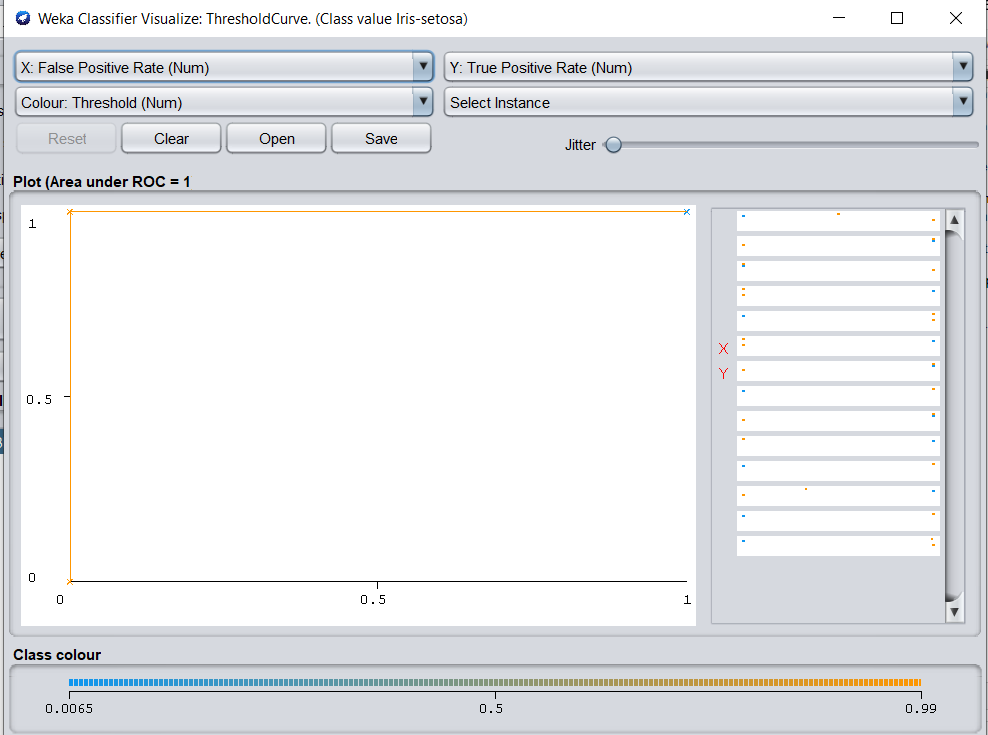

Iris-versica 

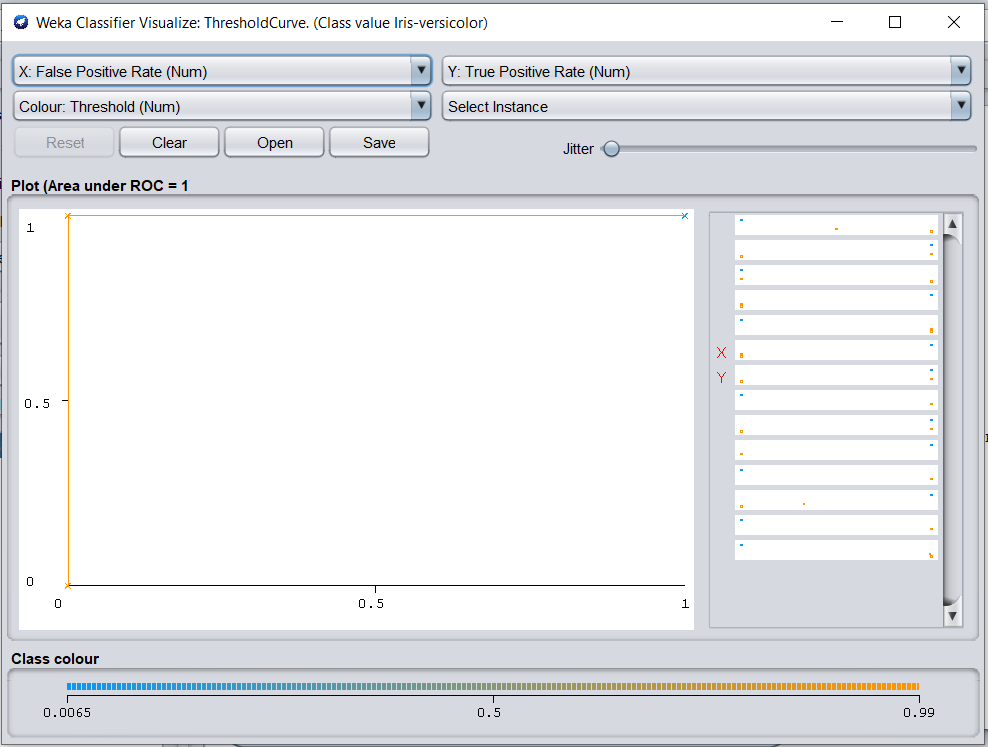

Iris-versicolor

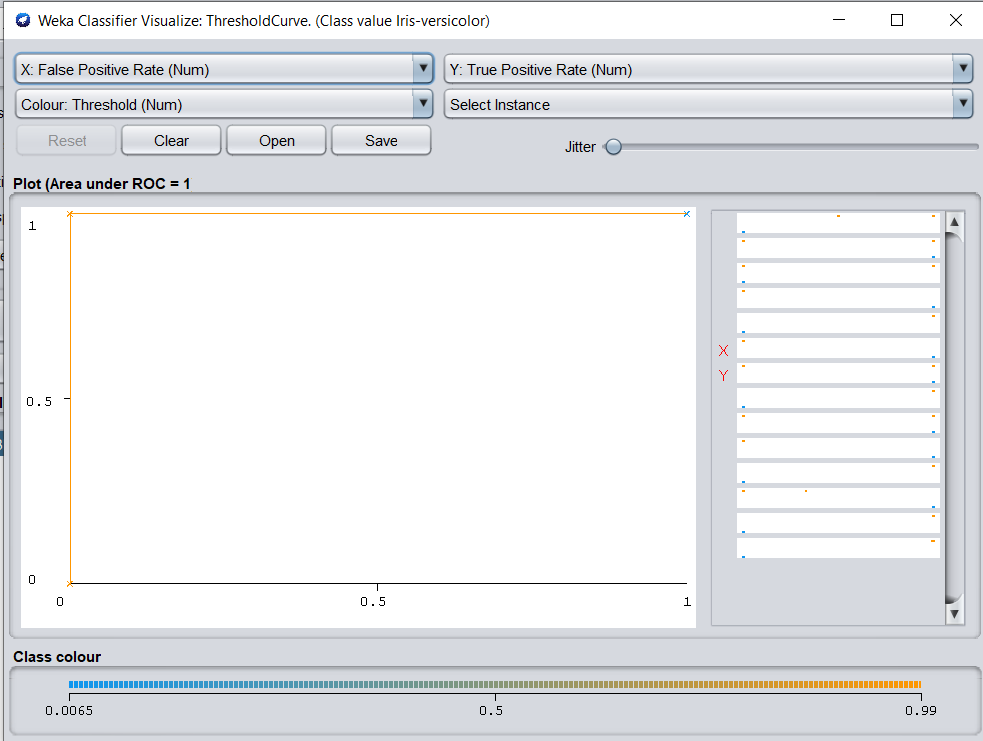


Support Vector Machines 

Iris-versicolor

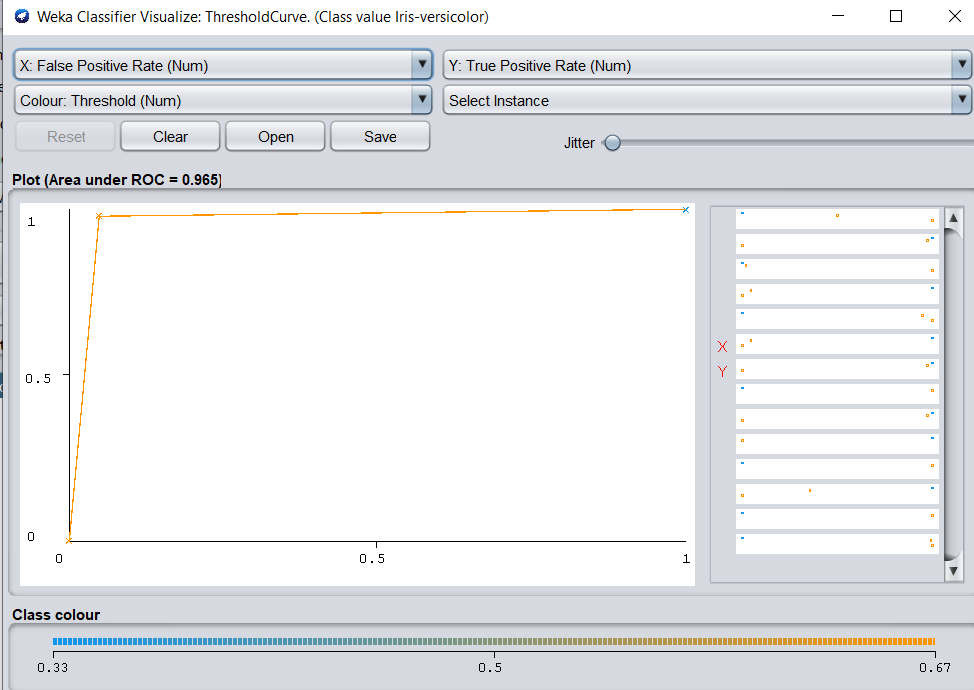

Iris setosa

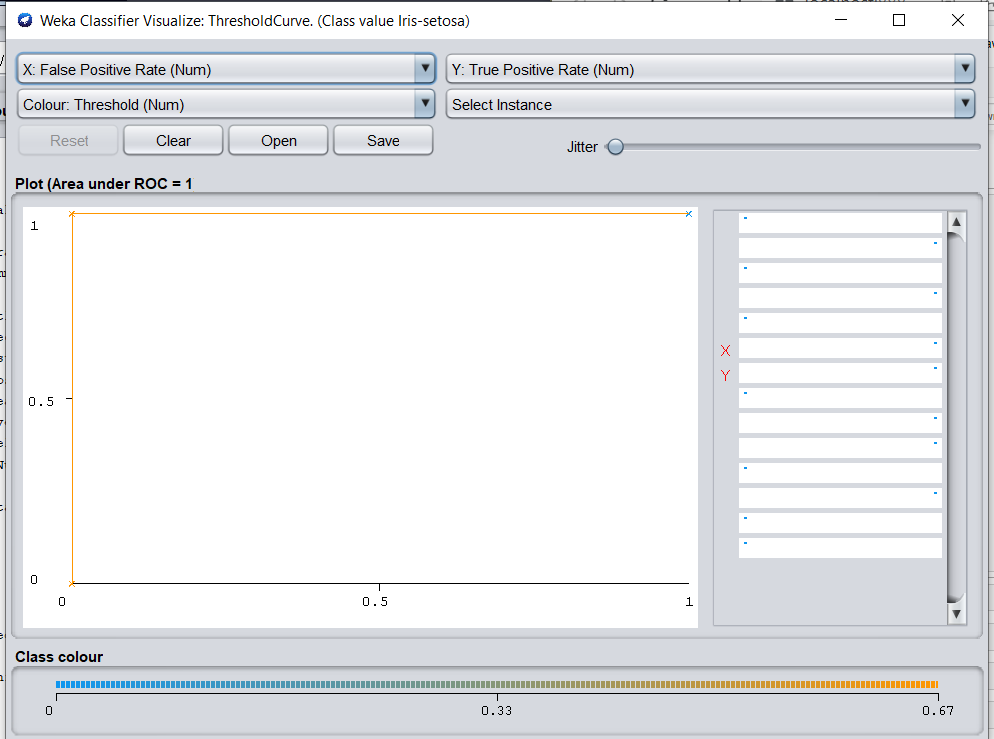

Iris-virginica
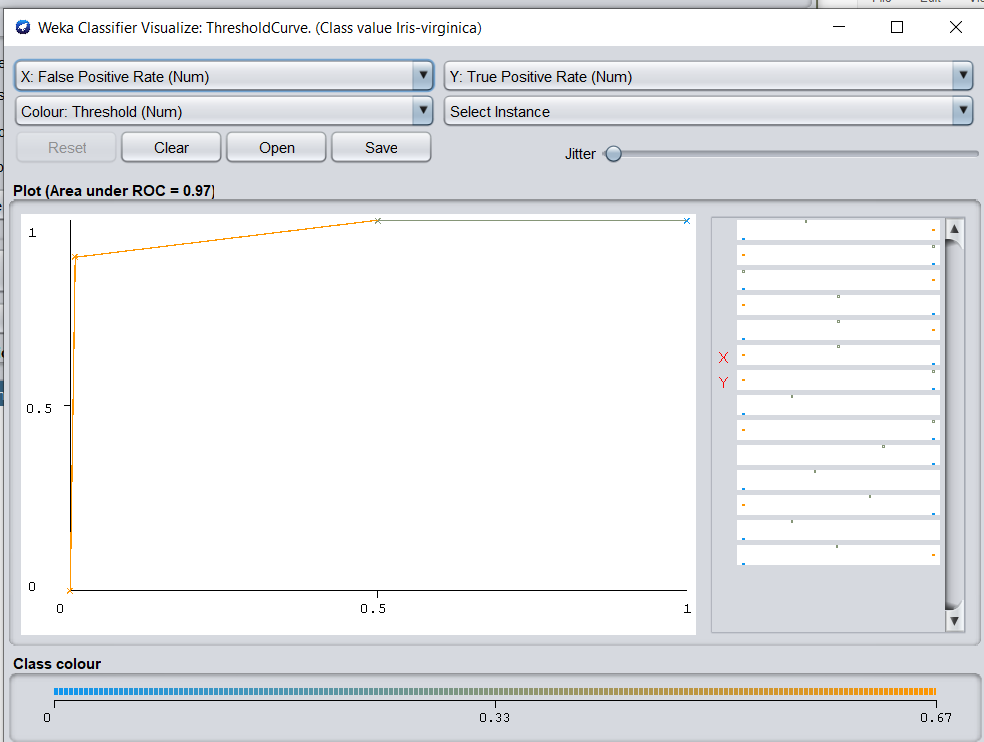

Desition Trees
Iris-setosa
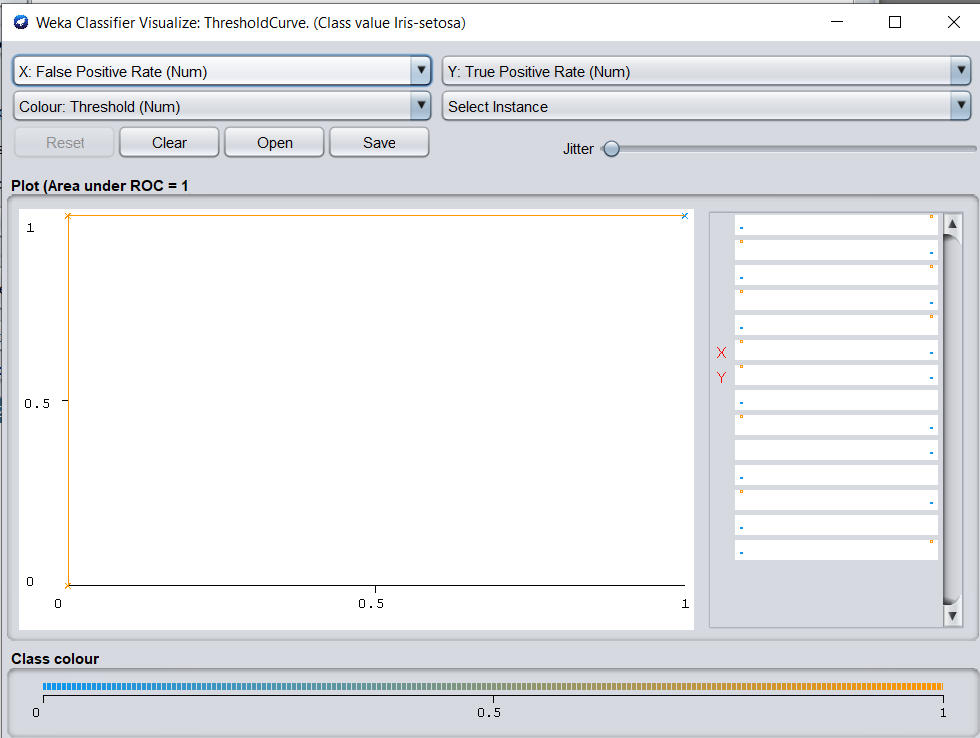

Iris-versicolor
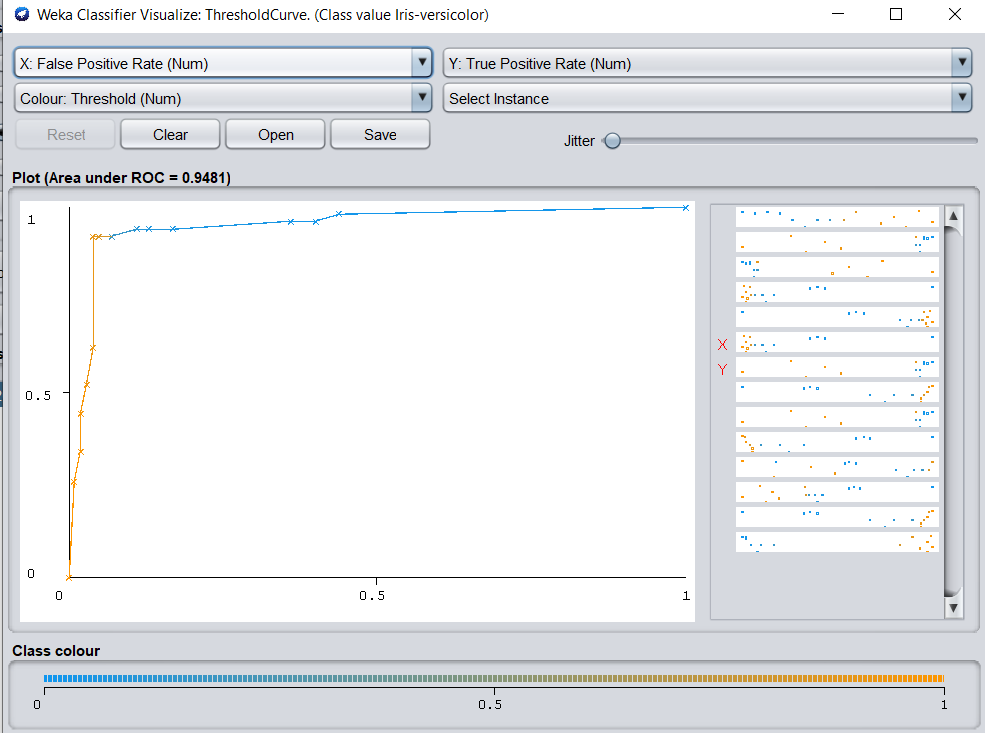

Iris-virginica
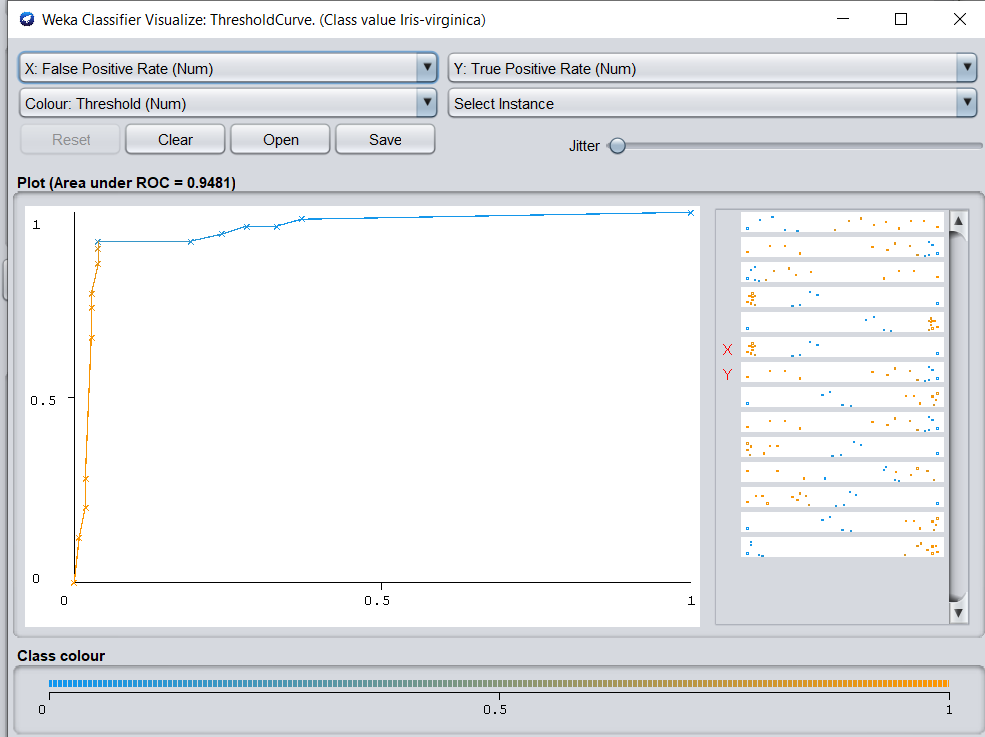


Random Forests

Iris-setosa
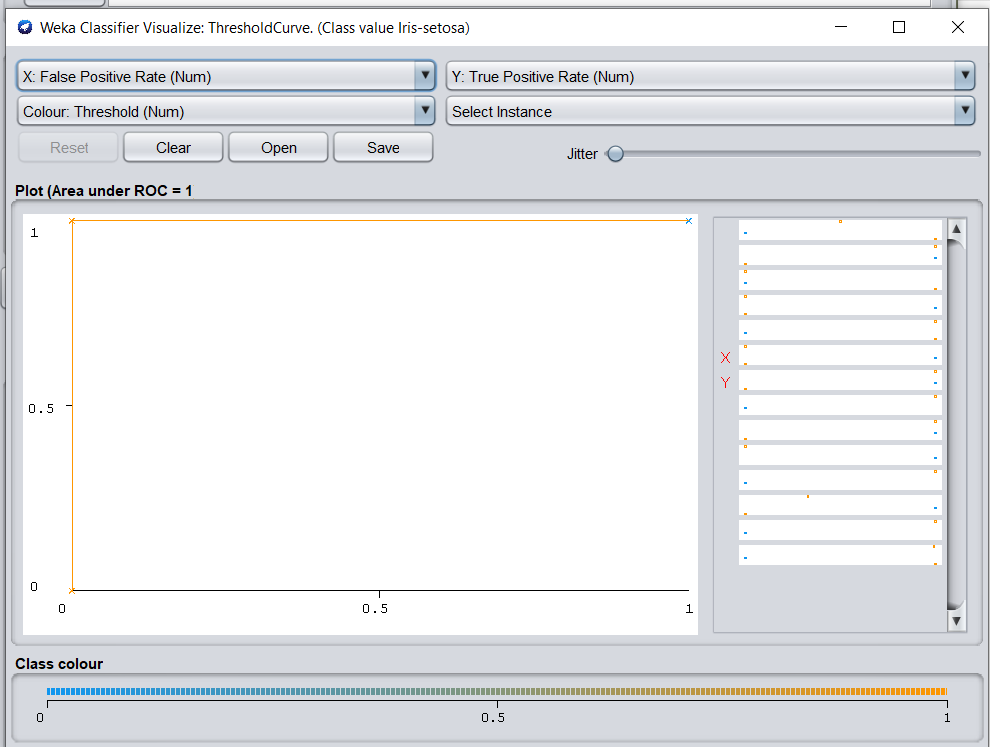

Iris-versicolor
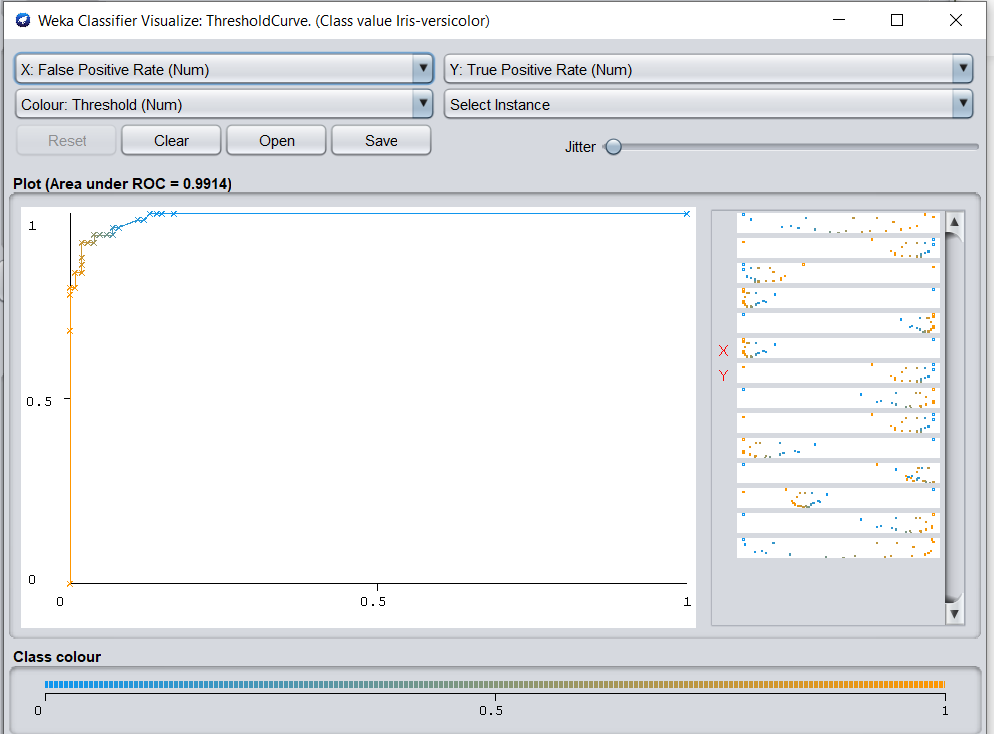


Iris-virginica

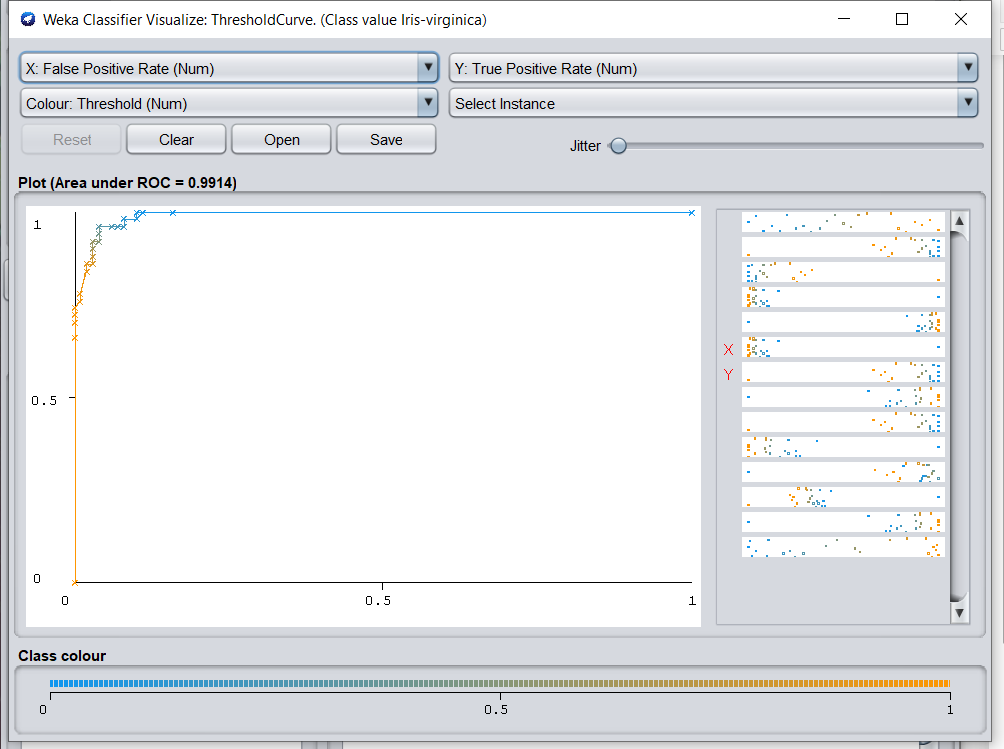


| Nombre Algoritmo | Acierto | Error |
| --- | --- | --- |
| KNN | 100% | 0% |
| SVM | 96.5% | 3.5% |
| Desition Tree | 94.81% | 5.19% |
| Random Forest | 99.14% | 0.86% |

**6.	Conclusiones y cierre (10 minutos):**
    
    Resumir los resultados obtenidos en la evaluación y comparación de los modelos.
    
    
    Los resultados obtenidos luego de realizar la evaluacion por cada algoritmo tuvieron diferencias uno respecto al otro, K-Nearest Neighbors (KNN) Score obtuvo una puntuacion 1.0 lo que significa que clasifica todos los datos de manera correcta ya que los datos entrenados estaban cercanos unos a otros, en cambio el algoritmo Support Vector Machines (SVM) Score obtuvo una puntuacion 0.9333333333333333 que sigue siendo buena pero no se compara con knn, luego el algoritmo de Decision Trees Score obtuvo un porcentaje de 0.8333333333333334 ya que no cumplia a cabalidad los criterios para ser evaluados correctamente con el mismo, finalmente el algoritmo de Random Forests Score obtuvo el porcentaje de 0.9.
    
    
    Discutir qué algoritmo funcionó mejor para la clasificación de las especies de flores iris.
    
    Luego de haber hecho el entrenamiento con la funcion train_test_split la cual se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba, se pudo obtener el resultado de que el mejor algoritmo es el de KNN ya que no presenta errores en el entrenamiento a la hora de evaluar el algoritmos y clasifica bien el dataset otorgado.
    
    Destacar la importancia de seleccionar el algoritmo adecuado según el problema y las métricas de evaluación más relevantes para cada caso.
    
    Es importante la eleccion adecuada de un algoritmo segun la necesidad ya que este va a cumplir las espectativas y requisitos de lo que se busca, algunos algoritmos cumplen unas metricas especificas qye se buscan y otros no tieenn eso, para el caso estudiado el algoritmo de knn fue el elegido dentro del analisis por su presicion ya que no presentaba errores a la hora de evaluar el modelo con dichos datos.
